# Implementing a simple two layers neural network
In this exercise we will develop a two neural network with fully-connected layers to perform classification, and test it out on the MNIST dataset.


In [1]:
"""
-----------------------------------------------------------------------------
A simple two layers neural network for handwritten digit classification (MNIST)
-----------------------------------------------------------------------------
AUTHOR: Soumitra Samanta (soumitra.samanta@gm.rkmvu.ac.in)
-----------------------------------------------------------------------------
"""

import gzip
import numpy as np
import matplotlib.pyplot as plt
import copy

from first_nn_sol import *

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


# Read MNIST data:
You can download the data from [here](https://yann.lecun.com/exdb/mnist/). There are many [way](https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python) you can read the MNIST data. Here is a [way](https://stackoverflow.com/a/62781370) to read all the information.

Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


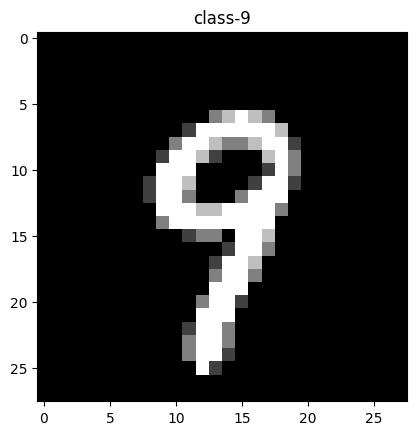

In [3]:
def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels


dataset_path = '../../Assignment1/Assignment_1_a/'

train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)

print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)

print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))



rand_ids = np.random.choice(train_images.shape[0])
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()



# TODO: Create a validation data from training data (10%) and transform the data in $\mathbf{R}^d$.

In [4]:
val_data_ration = 0.1
class_ids = list(set(train_labels))
val_ids = []
for cl in class_ids:
    temp_val_index = np.where(train_labels==cl)
    val_ids.extend(list(np.random.permutation(temp_val_index[0])[:round(temp_val_index[0].shape[0]*val_data_ration)]))
# print(val_ids)     
val_images = train_images[val_ids, :, :]  
val_labels = train_labels[val_ids]  
print('Val data (X) size: {}, and labels (Y) size: {}' .format(val_images.shape, val_labels.shape))

train_ids = [i for i in range(train_labels.shape[0]) if i not in val_labels]
revised_train_images = train_images[train_ids, :, :]  
revised_train_labels = train_labels[train_ids]  
 
X_train = revised_train_images.reshape(revised_train_images.shape[0], -1)
Y_train = revised_train_labels.reshape(-1)
X_val = val_images.reshape(val_images.shape[0], -1)
Y_val = val_labels.reshape(-1)
X_test = test_images.reshape(test_images.shape[0], -1)
Y_test = test_labels.reshape(-1)

print('After reshape\n')
print('Train data (X) size: {}, and labels (Y) size: {}' .format(X_train.shape, Y_train.shape))
print('Val data (X) size: {}, and labels (Y) size: {}' .format(X_val.shape, Y_val.shape))
print('Test data (X) size: {}, and labels (Y) size: {}' .format(X_test.shape, Y_test.shape))



                        
                        

Val data (X) size: (5999, 28, 28), and labels (Y) size: (5999,)
After reshape

Train data (X) size: (59990, 784), and labels (Y) size: (59990,)
Val data (X) size: (5999, 784), and labels (Y) size: (5999,)
Test data (X) size: (10000, 784), and labels (Y) size: (10000,)


# Train a network
To train our network we will use Stochastic Gradient Decent (SGD).

In [5]:
data_dimension = X_train.shape[1]
num_hidden_nodes = 50
num_classes = 10
net = FirstNN(data_dimension, num_hidden_nodes, num_classes)

# Train the network
stats = net.train(X_train, Y_train, X_val, Y_val, 
                  num_iters=10000,
                  num_epoch=30,
                  batch_size=200, 
                  learning_rate=1e-2, 
                  verbose=True
                 )





Training epoch 1/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 1.300711: 100%|██████████| 300/300 [00:01<00:00, 172.63it/s]


epoch: 1 / (30), loss: 1.737393, train acc: 74.36, val acc: 73.96
Training epoch 2/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.910239: 100%|██████████| 300/300 [00:01<00:00, 168.82it/s]


epoch: 2 / (30), loss: 1.077634, train acc: 87.95, val acc: 87.70
Training epoch 3/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.714817: 100%|██████████| 300/300 [00:01<00:00, 178.93it/s]


epoch: 3 / (30), loss: 0.773891, train acc: 89.48, val acc: 89.13
Training epoch 4/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.553179: 100%|██████████| 300/300 [00:01<00:00, 165.90it/s]


epoch: 4 / (30), loss: 0.610655, train acc: 90.67, val acc: 90.50
Training epoch 5/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.533342: 100%|██████████| 300/300 [00:01<00:00, 193.56it/s]


epoch: 5 / (30), loss: 0.513530, train acc: 91.05, val acc: 90.58
Training epoch 6/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.424021: 100%|██████████| 300/300 [00:01<00:00, 221.40it/s]


epoch: 6 / (30), loss: 0.453919, train acc: 91.43, val acc: 91.05
Training epoch 7/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.382370: 100%|██████████| 300/300 [00:01<00:00, 196.30it/s]


epoch: 7 / (30), loss: 0.413475, train acc: 91.82, val acc: 91.53
Training epoch 8/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.358260: 100%|██████████| 300/300 [00:01<00:00, 199.77it/s]


epoch: 8 / (30), loss: 0.383422, train acc: 91.98, val acc: 91.62
Training epoch 9/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.387639: 100%|██████████| 300/300 [00:01<00:00, 193.48it/s]


epoch: 9 / (30), loss: 0.359217, train acc: 92.35, val acc: 92.32
Training epoch 10/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.362052: 100%|██████████| 300/300 [00:01<00:00, 176.54it/s]


epoch: 10 / (30), loss: 0.338749, train acc: 92.57, val acc: 92.25
Training epoch 11/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.297418: 100%|██████████| 300/300 [00:01<00:00, 188.47it/s]


epoch: 11 / (30), loss: 0.324311, train acc: 92.84, val acc: 92.50
Training epoch 12/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.335937: 100%|██████████| 300/300 [00:01<00:00, 181.00it/s]


epoch: 12 / (30), loss: 0.309116, train acc: 92.96, val acc: 92.47
Training epoch 13/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.401741: 100%|██████████| 300/300 [00:01<00:00, 179.92it/s]


epoch: 13 / (30), loss: 0.298106, train acc: 93.13, val acc: 92.77
Training epoch 14/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.306857: 100%|██████████| 300/300 [00:01<00:00, 169.51it/s]


epoch: 14 / (30), loss: 0.287765, train acc: 93.30, val acc: 93.00
Training epoch 15/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.297002: 100%|██████████| 300/300 [00:01<00:00, 151.55it/s]


epoch: 15 / (30), loss: 0.278037, train acc: 93.32, val acc: 93.55
Training epoch 16/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.264336: 100%|██████████| 300/300 [00:02<00:00, 148.55it/s]


epoch: 16 / (30), loss: 0.271135, train acc: 93.31, val acc: 93.08
Training epoch 17/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.293983: 100%|██████████| 300/300 [00:02<00:00, 124.38it/s]


epoch: 17 / (30), loss: 0.265167, train acc: 93.91, val acc: 93.70
Training epoch 18/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.322587: 100%|██████████| 300/300 [00:02<00:00, 118.59it/s]


epoch: 18 / (30), loss: 0.258898, train acc: 93.93, val acc: 93.78
Training epoch 19/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.233278: 100%|██████████| 300/300 [00:02<00:00, 112.58it/s]


epoch: 19 / (30), loss: 0.251065, train acc: 93.85, val acc: 93.60
Training epoch 20/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.238677: 100%|██████████| 300/300 [00:02<00:00, 120.80it/s]


epoch: 20 / (30), loss: 0.246975, train acc: 93.98, val acc: 93.68
Training epoch 21/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.195789: 100%|██████████| 300/300 [00:02<00:00, 142.30it/s]


epoch: 21 / (30), loss: 0.240196, train acc: 93.97, val acc: 94.05
Training epoch 22/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.212453: 100%|██████████| 300/300 [00:02<00:00, 140.09it/s]


epoch: 22 / (30), loss: 0.236105, train acc: 94.13, val acc: 94.13
Training epoch 23/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.206886: 100%|██████████| 300/300 [00:02<00:00, 134.62it/s]


epoch: 23 / (30), loss: 0.231202, train acc: 94.28, val acc: 94.15
Training epoch 24/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.249152: 100%|██████████| 300/300 [00:03<00:00, 78.15it/s] 


epoch: 24 / (30), loss: 0.228422, train acc: 94.26, val acc: 93.93
Training epoch 25/(30)
----------------------------------------------------------------------


iteration: 262 / (300), loss: 0.177885:  86%|████████▋ | 259/300 [00:02<00:00, 162.01it/s]d:\x_MSC\3rd_sem\class\DL_NLP\Assignment1\Assignment_1d\first_nn_sol.py:27: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
iteration: 299 / (300), loss: 0.257139: 100%|██████████| 300/300 [00:02<00:00, 105.31it/s]


epoch: 25 / (30), loss: 0.224243, train acc: 94.40, val acc: 93.98
Training epoch 26/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.236840: 100%|██████████| 300/300 [00:01<00:00, 161.53it/s]


epoch: 26 / (30), loss: 0.219859, train acc: 94.52, val acc: 94.77
Training epoch 27/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.143428: 100%|██████████| 300/300 [00:01<00:00, 158.85it/s]


epoch: 27 / (30), loss: 0.216795, train acc: 94.48, val acc: 94.43
Training epoch 28/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.220434: 100%|██████████| 300/300 [00:01<00:00, 158.13it/s]


epoch: 28 / (30), loss: 0.213707, train acc: 94.55, val acc: 94.32
Training epoch 29/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.241599: 100%|██████████| 300/300 [00:01<00:00, 191.34it/s]


epoch: 29 / (30), loss: 0.211503, train acc: 94.54, val acc: 94.35
Training epoch 30/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.267307: 100%|██████████| 300/300 [00:01<00:00, 211.59it/s]


epoch: 30 / (30), loss: 0.208465, train acc: 94.77, val acc: 94.88


In [6]:
# Predict on the train set
Y_train_pred = net.predict(X_train, best_param=True)
train_acc = 100*(Y_train_pred == Y_train).mean()
print('Train accuracy: {:.2f}' .format(train_acc))

# Predict on the validation set
Y_val_pred = net.predict(X_val, best_param=True)
val_acc = 100*(Y_val_pred == Y_val).mean()
print('Validation accuracy: {:.2f}' .format(val_acc))

# Predict on the test set
Y_test_pred = net.predict(X_test, best_param=True)
test_acc = 100*(Y_test_pred == Y_test).mean()
print('Test accuracy: {:.2f}' .format(test_acc))

Train accuracy: 94.77
Validation accuracy: 94.88
Test accuracy: 93.92


# Plot the loss.

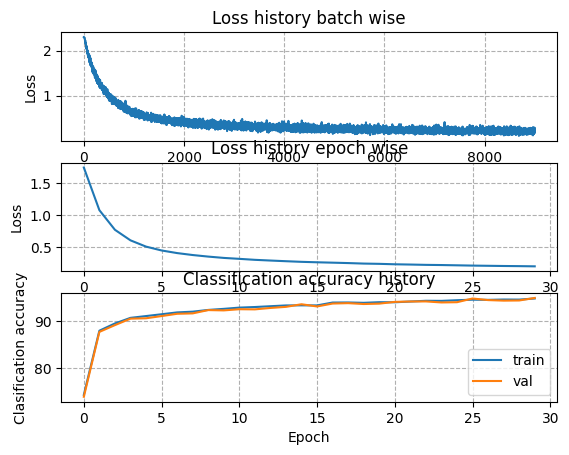

In [7]:
# Plot the loss function and train / validation accuracies
plt.subplot(3, 1, 1)
plt.plot(stats['loss_history_batch'])
plt.title('Loss history batch wise')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(linestyle='--')

plt.subplot(3, 1, 2)
plt.plot(stats['loss_history_epoch'])
plt.title('Loss history epoch wise')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(linestyle='--')

plt.subplot(3, 1, 3)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.grid(linestyle='--')
plt.legend()
plt.show()

# TODO: Tune your hyperparameters:
    - Learning rate:
    - Number of nodes in hidden layer:


In [8]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#################################################################################
results = {}
best_val = 0
best_net = None
learning_rates = [1e-3, 5e-3, 7e-3, 1e-2, 5e-2, 1e-1]
num_hidden_nodes = [30, 50, 60, 70, 100]
num_classes = 10
num_iters = 5000
num_epoch = 30
batch_size = 256
data_dimension = X_train.shape[1]

for nhn in num_hidden_nodes:
    for lr in learning_rates:
        
        net = FirstNN(data_dimension, nhn, num_classes)

        # Train the network
        stats = net.train(X_train, Y_train, X_val, Y_val, 
                          num_iters=num_iters,
                          num_epoch=num_epoch,
                          batch_size=batch_size, 
                          learning_rate=lr, 
                          verbose=False
                         )
            
        # Predict on the train set
        Y_train_pred = net.predict(X_train, best_param=True)
        train_acc = 100*(Y_train_pred == Y_train).mean()

        # Predict on the validation set
        Y_val_pred = net.predict(X_val, best_param=True)
        val_acc = 100*(Y_val_pred == Y_val).mean()

        results[(nhn, lr)] = (train_acc, val_acc)
        print('#hdnn: {}, lr: {} train accuracy: {:.2f} val accuracy: {:.2f}' .format(nhn, lr, train_acc, val_acc))
        if best_val < val_acc:
            best_val = val_acc
            best_net = copy.deepcopy(net)

# Print best results.
print('Best validation accuracy achieved during cross-validation: {:.2f} for #hdnn: {}, lr: {}' .format(best_val, best_net.best_params['W1'].shape[1], best_net.learning_rate))
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

#hdnn: 30, lr: 0.001 train accuracy: 89.29 val accuracy: 89.10
#hdnn: 30, lr: 0.005 train accuracy: 92.25 val accuracy: 92.40
#hdnn: 30, lr: 0.007 train accuracy: 92.45 val accuracy: 92.57
#hdnn: 30, lr: 0.01 train accuracy: 92.91 val accuracy: 92.77
#hdnn: 30, lr: 0.05 train accuracy: 92.37 val accuracy: 92.03
#hdnn: 30, lr: 0.1 train accuracy: 89.39 val accuracy: 89.56
#hdnn: 50, lr: 0.001 train accuracy: 91.22 val accuracy: 90.97
#hdnn: 50, lr: 0.005 train accuracy: 94.21 val accuracy: 94.25
#hdnn: 50, lr: 0.007 train accuracy: 94.90 val accuracy: 94.85
#hdnn: 50, lr: 0.01 train accuracy: 94.87 val accuracy: 94.93
#hdnn: 50, lr: 0.05 train accuracy: 94.08 val accuracy: 94.10
#hdnn: 50, lr: 0.1 train accuracy: 92.56 val accuracy: 92.62
#hdnn: 60, lr: 0.001 train accuracy: 91.64 val accuracy: 91.60
#hdnn: 60, lr: 0.005 train accuracy: 94.57 val accuracy: 94.40
#hdnn: 60, lr: 0.007 train accuracy: 95.18 val accuracy: 94.95
#hdnn: 60, lr: 0.01 train accuracy: 94.98 val accuracy: 94.85
#

# Test on best model

In [9]:
# Predict on the train set
Y_train_pred = best_net.predict(X_train, best_param=True)
train_acc = 100*(Y_train_pred == Y_train).mean()
print('Train accuracy: {:.2f}' .format(train_acc))

# Predict on the validation set
Y_val_pred = best_net.predict(X_val, best_param=True)
val_acc = 100*(Y_val_pred == Y_val).mean()
print('Validation accuracy: {:.2f}' .format(val_acc))

# Predict on the test set
Y_test_pred = best_net.predict(X_test, best_param=True)
test_acc = 100*(Y_test_pred == Y_test).mean()
print('Test accuracy: {:.2f}' .format(test_acc))

Train accuracy: 96.56
Validation accuracy: 96.37
Test accuracy: 95.11


## TODO: Play with different initialization

## GD + Small_Std


Training epoch 1/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.982863: 100%|██████████| 300/300 [00:03<00:00, 77.04it/s] 


epoch: 1 / (30), loss: 1.502804, train acc: 83.20, val acc: 82.68
Training epoch 2/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.646362: 100%|██████████| 300/300 [00:02<00:00, 117.79it/s]


epoch: 2 / (30), loss: 0.816712, train acc: 90.24, val acc: 90.02
Training epoch 3/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.460818: 100%|██████████| 300/300 [00:02<00:00, 110.57it/s]


epoch: 3 / (30), loss: 0.574379, train acc: 91.72, val acc: 91.72
Training epoch 4/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.400761: 100%|██████████| 300/300 [00:02<00:00, 103.60it/s]


epoch: 4 / (30), loss: 0.449725, train acc: 92.55, val acc: 92.52
Training epoch 5/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.371516: 100%|██████████| 300/300 [00:02<00:00, 110.02it/s]


epoch: 5 / (30), loss: 0.376943, train acc: 92.93, val acc: 92.93
Training epoch 6/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.273306: 100%|██████████| 300/300 [00:02<00:00, 106.18it/s]


epoch: 6 / (30), loss: 0.332984, train acc: 93.42, val acc: 93.18
Training epoch 7/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.389801: 100%|██████████| 300/300 [00:02<00:00, 104.63it/s]


epoch: 7 / (30), loss: 0.301449, train acc: 93.80, val acc: 93.92
Training epoch 8/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.264930: 100%|██████████| 300/300 [00:02<00:00, 113.17it/s]


epoch: 8 / (30), loss: 0.277682, train acc: 94.09, val acc: 93.88
Training epoch 9/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.268012: 100%|██████████| 300/300 [00:02<00:00, 120.86it/s]


epoch: 9 / (30), loss: 0.259789, train acc: 94.29, val acc: 94.03
Training epoch 10/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.200207: 100%|██████████| 300/300 [00:02<00:00, 122.67it/s]


epoch: 10 / (30), loss: 0.246584, train acc: 94.44, val acc: 94.38
Training epoch 11/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.198574: 100%|██████████| 300/300 [00:02<00:00, 116.42it/s]


epoch: 11 / (30), loss: 0.234399, train acc: 94.82, val acc: 94.77
Training epoch 12/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.224997: 100%|██████████| 300/300 [00:02<00:00, 119.35it/s]


epoch: 12 / (30), loss: 0.222490, train acc: 94.97, val acc: 94.93
Training epoch 13/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.221015: 100%|██████████| 300/300 [00:02<00:00, 123.97it/s]


epoch: 13 / (30), loss: 0.214372, train acc: 95.13, val acc: 95.08
Training epoch 14/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.206335: 100%|██████████| 300/300 [00:02<00:00, 117.81it/s]


epoch: 14 / (30), loss: 0.207128, train acc: 95.20, val acc: 95.07
Training epoch 15/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.139654: 100%|██████████| 300/300 [00:02<00:00, 116.22it/s]


epoch: 15 / (30), loss: 0.200570, train acc: 95.30, val acc: 95.13
Training epoch 16/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.169751: 100%|██████████| 300/300 [00:02<00:00, 112.81it/s]


epoch: 16 / (30), loss: 0.193116, train acc: 95.55, val acc: 95.30
Training epoch 17/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.169890: 100%|██████████| 300/300 [00:02<00:00, 119.55it/s]


epoch: 17 / (30), loss: 0.186409, train acc: 95.62, val acc: 95.48
Training epoch 18/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.190199: 100%|██████████| 300/300 [00:02<00:00, 120.36it/s]


epoch: 18 / (30), loss: 0.181569, train acc: 95.76, val acc: 95.53
Training epoch 19/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.177844: 100%|██████████| 300/300 [00:02<00:00, 121.01it/s]


epoch: 19 / (30), loss: 0.177222, train acc: 95.88, val acc: 95.83
Training epoch 20/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.129273: 100%|██████████| 300/300 [00:02<00:00, 121.69it/s]


epoch: 20 / (30), loss: 0.172004, train acc: 95.99, val acc: 95.93
Training epoch 21/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.165598: 100%|██████████| 300/300 [00:02<00:00, 119.03it/s]


epoch: 21 / (30), loss: 0.167699, train acc: 96.03, val acc: 95.98
Training epoch 22/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.225829: 100%|██████████| 300/300 [00:02<00:00, 121.71it/s]


epoch: 22 / (30), loss: 0.162562, train acc: 96.15, val acc: 96.02
Training epoch 23/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.170297: 100%|██████████| 300/300 [00:02<00:00, 116.04it/s]


epoch: 23 / (30), loss: 0.159530, train acc: 96.22, val acc: 96.12
Training epoch 24/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.134867: 100%|██████████| 300/300 [00:02<00:00, 117.88it/s]


epoch: 24 / (30), loss: 0.155919, train acc: 96.29, val acc: 96.00
Training epoch 25/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.220564: 100%|██████████| 300/300 [00:02<00:00, 117.38it/s]


epoch: 25 / (30), loss: 0.153068, train acc: 96.24, val acc: 96.30
Training epoch 26/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.091548: 100%|██████████| 300/300 [00:02<00:00, 113.98it/s]


epoch: 26 / (30), loss: 0.149352, train acc: 96.43, val acc: 96.42
Training epoch 27/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.136152: 100%|██████████| 300/300 [00:02<00:00, 115.01it/s]


epoch: 27 / (30), loss: 0.147818, train acc: 96.48, val acc: 96.18
Training epoch 28/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.143500: 100%|██████████| 300/300 [00:03<00:00, 92.35it/s] 


epoch: 28 / (30), loss: 0.144492, train acc: 96.48, val acc: 96.58
Training epoch 29/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.089986: 100%|██████████| 300/300 [00:02<00:00, 101.78it/s]


epoch: 29 / (30), loss: 0.140732, train acc: 96.54, val acc: 96.48
Training epoch 30/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.234810: 100%|██████████| 300/300 [00:02<00:00, 110.93it/s]


epoch: 30 / (30), loss: 0.137318, train acc: 96.64, val acc: 96.70
Train accuracy: 96.64
Validation accuracy: 96.70
Test accuracy: 95.17


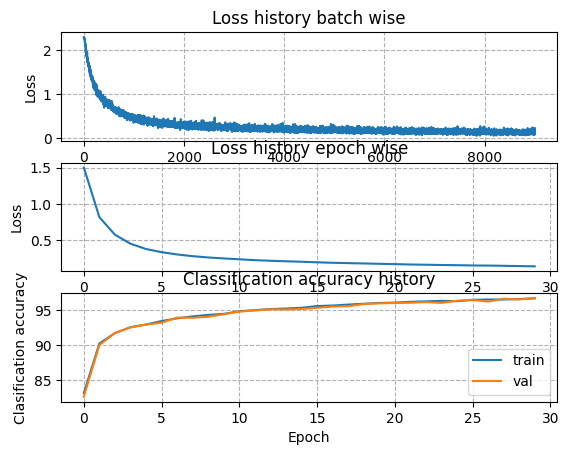

In [45]:
data_dimension = X_train.shape[1]
num_classes = 10

# Parameters
num_hidden_nodes = 100#best_net.best_params['W1'].shape[1]
learnin_rate = 0.01# best_net.learning_rate
num_epoch =  30
batch_size = 200

param_init = 'small_std'



net = FirstNN(data_dimension, num_hidden_nodes, num_classes, param_init=i)

# Train the network
stats = net.train(X_train, Y_train, X_val, Y_val, 
                  num_iters=10000,
                  num_epoch=num_epoch,
                  batch_size=batch_size, 
                  learning_rate=learnin_rate, 
                  verbose=True
                 )



# Predict on the train set
Y_train_pred = net.predict(X_train, best_param=True)
train_acc = 100*(Y_train_pred == Y_train).mean()
print('Train accuracy: {:.2f}' .format(train_acc))

# Predict on the validation set
Y_val_pred = net.predict(X_val, best_param=True)
val_acc = 100*(Y_val_pred == Y_val).mean()
print('Validation accuracy: {:.2f}' .format(val_acc))

# Predict on the test set
Y_test_pred = net.predict(X_test, best_param=True)
test_acc = 100*(Y_test_pred == Y_test).mean()
print('Test accuracy: {:.2f}' .format(test_acc))





# Plot the loss function and train / validation accuracies
plt.subplot(3, 1, 1)
plt.plot(stats['loss_history_batch'])
plt.title('Loss history batch wise')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(linestyle='--')

plt.subplot(3, 1, 2)
plt.plot(stats['loss_history_epoch'])
plt.title('Loss history epoch wise')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(linestyle='--')

plt.subplot(3, 1, 3)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.grid(linestyle='--')
plt.legend()
plt.show()

## GD + Ninn_Std

Training epoch 1/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.951113: 100%|██████████| 300/300 [00:03<00:00, 95.57it/s] 


epoch: 1 / (30), loss: 1.452395, train acc: 86.09, val acc: 85.75
Training epoch 2/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.622550: 100%|██████████| 300/300 [00:02<00:00, 109.41it/s]


epoch: 2 / (30), loss: 0.721025, train acc: 90.06, val acc: 89.80
Training epoch 3/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.391124: 100%|██████████| 300/300 [00:02<00:00, 100.52it/s]


epoch: 3 / (30), loss: 0.497749, train acc: 91.64, val acc: 91.68
Training epoch 4/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.285460: 100%|██████████| 300/300 [00:03<00:00, 98.18it/s] 


epoch: 4 / (30), loss: 0.397856, train acc: 92.58, val acc: 92.47
Training epoch 5/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.289711: 100%|██████████| 300/300 [00:02<00:00, 116.10it/s]


epoch: 5 / (30), loss: 0.342709, train acc: 92.86, val acc: 92.65
Training epoch 6/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.360964: 100%|██████████| 300/300 [00:02<00:00, 114.21it/s]


epoch: 6 / (30), loss: 0.306045, train acc: 93.43, val acc: 93.35
Training epoch 7/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.223592: 100%|██████████| 300/300 [00:03<00:00, 90.47it/s] 


epoch: 7 / (30), loss: 0.279928, train acc: 93.95, val acc: 93.77
Training epoch 8/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.235328: 100%|██████████| 300/300 [00:03<00:00, 93.51it/s] 


epoch: 8 / (30), loss: 0.260567, train acc: 94.31, val acc: 93.78
Training epoch 9/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.306678: 100%|██████████| 300/300 [00:02<00:00, 111.17it/s]


epoch: 9 / (30), loss: 0.244168, train acc: 94.38, val acc: 94.10
Training epoch 10/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.250341: 100%|██████████| 300/300 [00:02<00:00, 121.21it/s]


epoch: 10 / (30), loss: 0.231524, train acc: 94.79, val acc: 94.47
Training epoch 11/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.209705: 100%|██████████| 300/300 [00:02<00:00, 114.64it/s]


epoch: 11 / (30), loss: 0.219257, train acc: 94.91, val acc: 95.00
Training epoch 12/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.167408: 100%|██████████| 300/300 [00:02<00:00, 100.79it/s]


epoch: 12 / (30), loss: 0.210747, train acc: 94.98, val acc: 94.62
Training epoch 13/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.206166: 100%|██████████| 300/300 [00:03<00:00, 92.11it/s] 


epoch: 13 / (30), loss: 0.203208, train acc: 95.34, val acc: 95.07
Training epoch 14/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.142319: 100%|██████████| 300/300 [00:02<00:00, 102.84it/s]


epoch: 14 / (30), loss: 0.195550, train acc: 95.47, val acc: 95.35
Training epoch 15/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.155161: 100%|██████████| 300/300 [00:02<00:00, 122.16it/s]


epoch: 15 / (30), loss: 0.189758, train acc: 95.41, val acc: 95.27
Training epoch 16/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.246342: 100%|██████████| 300/300 [00:02<00:00, 103.82it/s]


epoch: 16 / (30), loss: 0.184728, train acc: 95.62, val acc: 95.28
Training epoch 17/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.173169: 100%|██████████| 300/300 [00:03<00:00, 92.64it/s] 


epoch: 17 / (30), loss: 0.178534, train acc: 95.85, val acc: 95.57
Training epoch 18/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.174833: 100%|██████████| 300/300 [00:02<00:00, 100.11it/s]


epoch: 18 / (30), loss: 0.172428, train acc: 95.96, val acc: 96.00
Training epoch 19/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.092054: 100%|██████████| 300/300 [00:02<00:00, 105.38it/s]


epoch: 19 / (30), loss: 0.168036, train acc: 96.05, val acc: 96.03
Training epoch 20/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.168680: 100%|██████████| 300/300 [00:03<00:00, 95.41it/s] 


epoch: 20 / (30), loss: 0.163076, train acc: 96.08, val acc: 96.10
Training epoch 21/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.188372: 100%|██████████| 300/300 [00:02<00:00, 101.46it/s]


epoch: 21 / (30), loss: 0.158041, train acc: 96.19, val acc: 96.07
Training epoch 22/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.165320: 100%|██████████| 300/300 [00:02<00:00, 104.67it/s]


epoch: 22 / (30), loss: 0.155752, train acc: 96.35, val acc: 96.02
Training epoch 23/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.170948: 100%|██████████| 300/300 [00:02<00:00, 104.36it/s]


epoch: 23 / (30), loss: 0.150555, train acc: 96.52, val acc: 96.42
Training epoch 24/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.135259: 100%|██████████| 300/300 [00:02<00:00, 103.99it/s]


epoch: 24 / (30), loss: 0.148722, train acc: 96.59, val acc: 96.47
Training epoch 25/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.122009: 100%|██████████| 300/300 [00:02<00:00, 112.33it/s]


epoch: 25 / (30), loss: 0.144754, train acc: 96.56, val acc: 96.43
Training epoch 26/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.123974: 100%|██████████| 300/300 [00:02<00:00, 112.99it/s]


epoch: 26 / (30), loss: 0.141051, train acc: 96.76, val acc: 96.75
Training epoch 27/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.165563: 100%|██████████| 300/300 [00:02<00:00, 115.28it/s]


epoch: 27 / (30), loss: 0.138664, train acc: 96.66, val acc: 96.75
Training epoch 28/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.107733: 100%|██████████| 300/300 [00:02<00:00, 108.69it/s]


epoch: 28 / (30), loss: 0.136744, train acc: 96.69, val acc: 96.60
Training epoch 29/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.166720: 100%|██████████| 300/300 [00:02<00:00, 108.75it/s]


epoch: 29 / (30), loss: 0.132411, train acc: 96.79, val acc: 96.78
Training epoch 30/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.185473: 100%|██████████| 300/300 [00:02<00:00, 111.99it/s]


epoch: 30 / (30), loss: 0.131222, train acc: 96.83, val acc: 97.02
Train accuracy: 96.83
Validation accuracy: 97.02
Test accuracy: 95.49


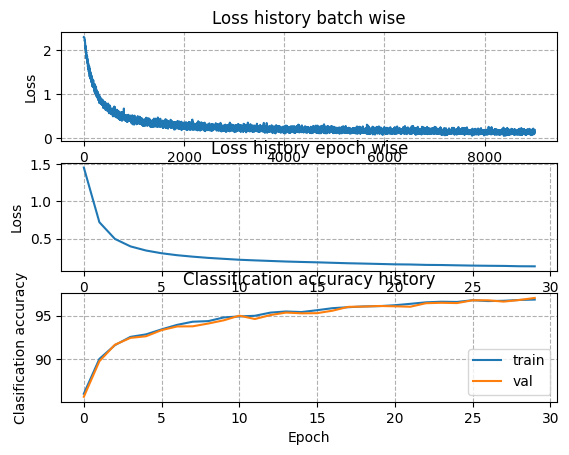

In [46]:
data_dimension = X_train.shape[1]
num_classes = 10

# Parameters
num_hidden_nodes = 100#best_net.best_params['W1'].shape[1]
learnin_rate = 0.01# best_net.learning_rate
num_epoch =  30
batch_size = 200

param_init = 'ninn_std'



net = FirstNN(data_dimension, num_hidden_nodes, num_classes, param_init=i)

# Train the network
stats = net.train(X_train, Y_train, X_val, Y_val, 
                  num_iters=10000,
                  num_epoch=num_epoch,
                  batch_size=batch_size, 
                  learning_rate=learnin_rate, 
                  verbose=True
                 )



# Predict on the train set
Y_train_pred = net.predict(X_train, best_param=True)
train_acc = 100*(Y_train_pred == Y_train).mean()
print('Train accuracy: {:.2f}' .format(train_acc))

# Predict on the validation set
Y_val_pred = net.predict(X_val, best_param=True)
val_acc = 100*(Y_val_pred == Y_val).mean()
print('Validation accuracy: {:.2f}' .format(val_acc))

# Predict on the test set
Y_test_pred = net.predict(X_test, best_param=True)
test_acc = 100*(Y_test_pred == Y_test).mean()
print('Test accuracy: {:.2f}' .format(test_acc))





# Plot the loss function and train / validation accuracies
plt.subplot(3, 1, 1)
plt.plot(stats['loss_history_batch'])
plt.title('Loss history batch wise')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(linestyle='--')

plt.subplot(3, 1, 2)
plt.plot(stats['loss_history_epoch'])
plt.title('Loss history epoch wise')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(linestyle='--')

plt.subplot(3, 1, 3)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.grid(linestyle='--')
plt.legend()
plt.show()

## GD + Xavier

Training epoch 1/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.812922: 100%|██████████| 300/300 [00:02<00:00, 121.45it/s]


epoch: 1 / (30), loss: 1.424417, train acc: 86.28, val acc: 86.25
Training epoch 2/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.578746: 100%|██████████| 300/300 [00:02<00:00, 115.03it/s]


epoch: 2 / (30), loss: 0.697259, train acc: 90.16, val acc: 90.07
Training epoch 3/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.383053: 100%|██████████| 300/300 [00:02<00:00, 124.93it/s]


epoch: 3 / (30), loss: 0.490055, train acc: 91.96, val acc: 91.80
Training epoch 4/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.437998: 100%|██████████| 300/300 [00:02<00:00, 117.19it/s]


epoch: 4 / (30), loss: 0.396710, train acc: 92.47, val acc: 92.52
Training epoch 5/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.223519: 100%|██████████| 300/300 [00:02<00:00, 125.28it/s]


epoch: 5 / (30), loss: 0.344131, train acc: 93.20, val acc: 93.07
Training epoch 6/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.264693: 100%|██████████| 300/300 [00:02<00:00, 125.45it/s]


epoch: 6 / (30), loss: 0.309020, train acc: 93.25, val acc: 92.98
Training epoch 7/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.383758: 100%|██████████| 300/300 [00:02<00:00, 118.91it/s]


epoch: 7 / (30), loss: 0.283193, train acc: 93.77, val acc: 93.62
Training epoch 8/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.264746: 100%|██████████| 300/300 [00:02<00:00, 124.70it/s]


epoch: 8 / (30), loss: 0.263829, train acc: 94.13, val acc: 94.22
Training epoch 9/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.226853: 100%|██████████| 300/300 [00:02<00:00, 124.80it/s]


epoch: 9 / (30), loss: 0.249421, train acc: 94.29, val acc: 94.35
Training epoch 10/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.192482: 100%|██████████| 300/300 [00:02<00:00, 122.81it/s]


epoch: 10 / (30), loss: 0.236009, train acc: 94.44, val acc: 94.15
Training epoch 11/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.209240: 100%|██████████| 300/300 [00:02<00:00, 122.40it/s]


epoch: 11 / (30), loss: 0.225772, train acc: 94.52, val acc: 94.12
Training epoch 12/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.198712: 100%|██████████| 300/300 [00:02<00:00, 123.51it/s]


epoch: 12 / (30), loss: 0.215046, train acc: 95.06, val acc: 94.83
Training epoch 13/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.257212: 100%|██████████| 300/300 [00:02<00:00, 125.00it/s]


epoch: 13 / (30), loss: 0.207118, train acc: 95.12, val acc: 95.00
Training epoch 14/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.238134: 100%|██████████| 300/300 [00:02<00:00, 122.43it/s]


epoch: 14 / (30), loss: 0.199286, train acc: 95.12, val acc: 94.98
Training epoch 15/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.146470: 100%|██████████| 300/300 [00:02<00:00, 115.29it/s]


epoch: 15 / (30), loss: 0.193293, train acc: 95.38, val acc: 95.18
Training epoch 16/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.148015: 100%|██████████| 300/300 [00:02<00:00, 123.07it/s]


epoch: 16 / (30), loss: 0.187222, train acc: 95.69, val acc: 95.62
Training epoch 17/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.218170: 100%|██████████| 300/300 [00:02<00:00, 119.99it/s]


epoch: 17 / (30), loss: 0.181180, train acc: 95.76, val acc: 95.85
Training epoch 18/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.195654: 100%|██████████| 300/300 [00:02<00:00, 124.27it/s]


epoch: 18 / (30), loss: 0.176743, train acc: 95.79, val acc: 95.67
Training epoch 19/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.238722: 100%|██████████| 300/300 [00:02<00:00, 116.85it/s]


epoch: 19 / (30), loss: 0.171770, train acc: 95.93, val acc: 95.97
Training epoch 20/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.200222: 100%|██████████| 300/300 [00:02<00:00, 114.34it/s]


epoch: 20 / (30), loss: 0.167338, train acc: 95.85, val acc: 95.93
Training epoch 21/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.190129: 100%|██████████| 300/300 [00:02<00:00, 116.94it/s]


epoch: 21 / (30), loss: 0.162132, train acc: 96.01, val acc: 96.05
Training epoch 22/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.166050: 100%|██████████| 300/300 [00:02<00:00, 123.52it/s]


epoch: 22 / (30), loss: 0.158443, train acc: 96.15, val acc: 96.17
Training epoch 23/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.136415: 100%|██████████| 300/300 [00:02<00:00, 121.15it/s]


epoch: 23 / (30), loss: 0.153365, train acc: 96.41, val acc: 96.25
Training epoch 24/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.119099: 100%|██████████| 300/300 [00:02<00:00, 119.28it/s]


epoch: 24 / (30), loss: 0.150644, train acc: 96.34, val acc: 96.23
Training epoch 25/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.148477: 100%|██████████| 300/300 [00:02<00:00, 115.49it/s]


epoch: 25 / (30), loss: 0.147578, train acc: 96.29, val acc: 96.28
Training epoch 26/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.122001: 100%|██████████| 300/300 [00:02<00:00, 122.96it/s]


epoch: 26 / (30), loss: 0.144894, train acc: 96.60, val acc: 96.68
Training epoch 27/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.154304: 100%|██████████| 300/300 [00:02<00:00, 124.29it/s]


epoch: 27 / (30), loss: 0.141718, train acc: 96.44, val acc: 96.47
Training epoch 28/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.112288: 100%|██████████| 300/300 [00:02<00:00, 128.04it/s]


epoch: 28 / (30), loss: 0.139812, train acc: 96.76, val acc: 96.65
Training epoch 29/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.107159: 100%|██████████| 300/300 [00:02<00:00, 124.18it/s]


epoch: 29 / (30), loss: 0.136759, train acc: 96.73, val acc: 96.77
Training epoch 30/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.137356: 100%|██████████| 300/300 [00:02<00:00, 121.42it/s]


epoch: 30 / (30), loss: 0.134813, train acc: 96.76, val acc: 96.83
Train accuracy: 96.76
Validation accuracy: 96.83
Test accuracy: 95.37


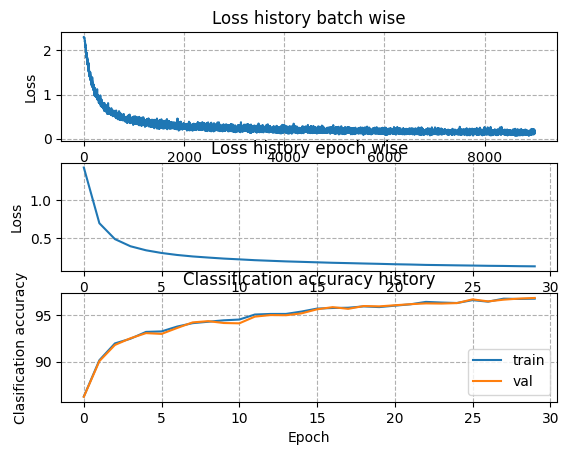

In [47]:
data_dimension = X_train.shape[1]
num_classes = 10

# Parameters
num_hidden_nodes = 100#best_net.best_params['W1'].shape[1]
learnin_rate = 0.01# best_net.learning_rate
num_epoch =  30
batch_size = 200

param_init = 'Xavier'



net = FirstNN(data_dimension, num_hidden_nodes, num_classes, param_init=i)

# Train the network
stats = net.train(X_train, Y_train, X_val, Y_val, 
                  num_iters=10000,
                  num_epoch=num_epoch,
                  batch_size=batch_size, 
                  learning_rate=learnin_rate, 
                  verbose=True
                 )



# Predict on the train set
Y_train_pred = net.predict(X_train, best_param=True)
train_acc = 100*(Y_train_pred == Y_train).mean()
print('Train accuracy: {:.2f}' .format(train_acc))

# Predict on the validation set
Y_val_pred = net.predict(X_val, best_param=True)
val_acc = 100*(Y_val_pred == Y_val).mean()
print('Validation accuracy: {:.2f}' .format(val_acc))

# Predict on the test set
Y_test_pred = net.predict(X_test, best_param=True)
test_acc = 100*(Y_test_pred == Y_test).mean()
print('Test accuracy: {:.2f}' .format(test_acc))





# Plot the loss function and train / validation accuracies
plt.subplot(3, 1, 1)
plt.plot(stats['loss_history_batch'])
plt.title('Loss history batch wise')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(linestyle='--')

plt.subplot(3, 1, 2)
plt.plot(stats['loss_history_epoch'])
plt.title('Loss history epoch wise')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(linestyle='--')

plt.subplot(3, 1, 3)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.grid(linestyle='--')
plt.legend()
plt.show()

## MGD + Small_Std

Training epoch 1/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 1.034760: 100%|██████████| 300/300 [00:02<00:00, 116.01it/s]


epoch: 1 / (30), loss: 1.517495, train acc: 80.67, val acc: 80.78
Training epoch 2/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.659078: 100%|██████████| 300/300 [00:02<00:00, 114.13it/s]


epoch: 2 / (30), loss: 0.872867, train acc: 88.30, val acc: 88.50
Training epoch 3/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.549227: 100%|██████████| 300/300 [00:02<00:00, 104.95it/s]


epoch: 3 / (30), loss: 0.613206, train acc: 90.58, val acc: 90.77
Training epoch 4/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.434879: 100%|██████████| 300/300 [00:02<00:00, 115.20it/s]


epoch: 4 / (30), loss: 0.464884, train acc: 92.26, val acc: 91.65
Training epoch 5/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.349959: 100%|██████████| 300/300 [00:02<00:00, 111.13it/s]


epoch: 5 / (30), loss: 0.385444, train acc: 92.74, val acc: 92.70
Training epoch 6/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.358725: 100%|██████████| 300/300 [00:02<00:00, 116.67it/s]


epoch: 6 / (30), loss: 0.337764, train acc: 93.05, val acc: 92.95
Training epoch 7/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.307375: 100%|██████████| 300/300 [00:02<00:00, 116.68it/s]


epoch: 7 / (30), loss: 0.304252, train acc: 93.52, val acc: 93.33
Training epoch 8/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.296200: 100%|██████████| 300/300 [00:02<00:00, 111.13it/s]


epoch: 8 / (30), loss: 0.280526, train acc: 93.88, val acc: 93.70
Training epoch 9/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.252250: 100%|██████████| 300/300 [00:02<00:00, 111.16it/s]


epoch: 9 / (30), loss: 0.262674, train acc: 94.00, val acc: 94.03
Training epoch 10/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.212119: 100%|██████████| 300/300 [00:02<00:00, 116.02it/s]


epoch: 10 / (30), loss: 0.248937, train acc: 94.45, val acc: 94.25
Training epoch 11/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.233957: 100%|██████████| 300/300 [00:02<00:00, 115.24it/s]


epoch: 11 / (30), loss: 0.234704, train acc: 94.58, val acc: 94.73
Training epoch 12/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.177660: 100%|██████████| 300/300 [00:02<00:00, 116.88it/s]


epoch: 12 / (30), loss: 0.223034, train acc: 94.78, val acc: 94.70
Training epoch 13/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.218829: 100%|██████████| 300/300 [00:02<00:00, 123.77it/s]


epoch: 13 / (30), loss: 0.215364, train acc: 94.97, val acc: 95.05
Training epoch 14/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.194615: 100%|██████████| 300/300 [00:02<00:00, 129.48it/s]


epoch: 14 / (30), loss: 0.206637, train acc: 95.03, val acc: 94.88
Training epoch 15/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.283806: 100%|██████████| 300/300 [00:02<00:00, 134.08it/s]


epoch: 15 / (30), loss: 0.197607, train acc: 95.21, val acc: 95.07
Training epoch 16/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.218986: 100%|██████████| 300/300 [00:02<00:00, 119.07it/s]


epoch: 16 / (30), loss: 0.194260, train acc: 95.17, val acc: 94.95
Training epoch 17/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.186737: 100%|██████████| 300/300 [00:02<00:00, 131.01it/s]


epoch: 17 / (30), loss: 0.185017, train acc: 95.52, val acc: 95.72
Training epoch 18/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.163195: 100%|██████████| 300/300 [00:02<00:00, 125.71it/s]


epoch: 18 / (30), loss: 0.180563, train acc: 95.72, val acc: 95.80
Training epoch 19/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.218777: 100%|██████████| 300/300 [00:02<00:00, 128.39it/s]


epoch: 19 / (30), loss: 0.174186, train acc: 95.57, val acc: 95.37
Training epoch 20/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.123464: 100%|██████████| 300/300 [00:02<00:00, 128.54it/s]


epoch: 20 / (30), loss: 0.170681, train acc: 95.90, val acc: 95.62
Training epoch 21/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.194322: 100%|██████████| 300/300 [00:02<00:00, 125.67it/s]


epoch: 21 / (30), loss: 0.165407, train acc: 95.99, val acc: 95.88
Training epoch 22/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.123972: 100%|██████████| 300/300 [00:02<00:00, 128.12it/s]


epoch: 22 / (30), loss: 0.161017, train acc: 95.95, val acc: 95.80
Training epoch 23/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.213086: 100%|██████████| 300/300 [00:02<00:00, 132.91it/s]


epoch: 23 / (30), loss: 0.158175, train acc: 96.22, val acc: 95.90
Training epoch 24/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.155231: 100%|██████████| 300/300 [00:02<00:00, 128.74it/s]


epoch: 24 / (30), loss: 0.155803, train acc: 96.26, val acc: 96.05
Training epoch 25/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.122361: 100%|██████████| 300/300 [00:02<00:00, 130.59it/s]


epoch: 25 / (30), loss: 0.150120, train acc: 96.24, val acc: 95.97
Training epoch 26/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.140370: 100%|██████████| 300/300 [00:02<00:00, 125.44it/s]


epoch: 26 / (30), loss: 0.148197, train acc: 96.32, val acc: 96.03
Training epoch 27/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.134956: 100%|██████████| 300/300 [00:02<00:00, 133.37it/s]


epoch: 27 / (30), loss: 0.144220, train acc: 96.50, val acc: 96.20
Training epoch 28/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.176187: 100%|██████████| 300/300 [00:02<00:00, 126.49it/s]


epoch: 28 / (30), loss: 0.142192, train acc: 96.47, val acc: 96.10
Training epoch 29/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.151428: 100%|██████████| 300/300 [00:02<00:00, 129.75it/s]


epoch: 29 / (30), loss: 0.138522, train acc: 96.35, val acc: 95.98
Training epoch 30/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.142796: 100%|██████████| 300/300 [00:02<00:00, 126.61it/s]


epoch: 30 / (30), loss: 0.135566, train acc: 96.74, val acc: 96.58
Train accuracy: 96.74
Validation accuracy: 96.58
Test accuracy: 95.46


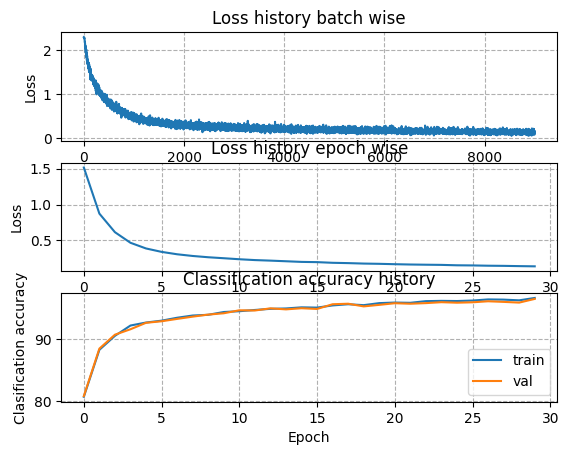

In [48]:
data_dimension = X_train.shape[1]
num_classes = 10

# Parameters
num_hidden_nodes = 100#best_net.best_params['W1'].shape[1]
learnin_rate = 0.01# best_net.learning_rate
num_epoch =  30
batch_size = 200
beta_moment = 1e-1
update_rule = 'm_gd'

param_init = 'small_std'#'Xavier'# 'Xavier'#

net = FirstNN(data_dimension, num_hidden_nodes, num_classes, param_init=param_init)

# Train the network
stats = net.train(X_train, Y_train, X_val, Y_val, 
                  num_iters=10000,
                  num_epoch=num_epoch,
                  batch_size=batch_size, 
                  learning_rate=learnin_rate, 
                  beta_moment=beta_moment,
                  update_rule=update_rule,
                  verbose=True
                 )


# Predict on the train set
Y_train_pred = net.predict(X_train, best_param=True)
train_acc = 100*(Y_train_pred == Y_train).mean()
print('Train accuracy: {:.2f}' .format(train_acc))

# Predict on the validation set
Y_val_pred = net.predict(X_val, best_param=True)
val_acc = 100*(Y_val_pred == Y_val).mean()
print('Validation accuracy: {:.2f}' .format(val_acc))

# Predict on the test set
Y_test_pred = net.predict(X_test, best_param=True)
test_acc = 100*(Y_test_pred == Y_test).mean()
print('Test accuracy: {:.2f}' .format(test_acc))





# Plot the loss function and train / validation accuracies
plt.subplot(3, 1, 1)
plt.plot(stats['loss_history_batch'])
plt.title('Loss history batch wise')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(linestyle='--')

plt.subplot(3, 1, 2)
plt.plot(stats['loss_history_epoch'])
plt.title('Loss history epoch wise')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(linestyle='--')

plt.subplot(3, 1, 3)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.grid(linestyle='--')
plt.legend()
plt.show()

## MGD + Ninn_Std

Training epoch 1/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.681219: 100%|██████████| 300/300 [00:02<00:00, 121.50it/s]


epoch: 1 / (30), loss: 1.142116, train acc: 85.97, val acc: 85.75
Training epoch 2/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.535566: 100%|██████████| 300/300 [00:02<00:00, 127.46it/s]


epoch: 2 / (30), loss: 0.592479, train acc: 88.90, val acc: 88.45
Training epoch 3/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.379215: 100%|██████████| 300/300 [00:02<00:00, 128.59it/s]


epoch: 3 / (30), loss: 0.460619, train acc: 90.25, val acc: 89.76
Training epoch 4/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.322814: 100%|██████████| 300/300 [00:02<00:00, 128.94it/s]


epoch: 4 / (30), loss: 0.394618, train acc: 91.03, val acc: 90.25
Training epoch 5/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.413203: 100%|██████████| 300/300 [00:02<00:00, 129.70it/s]


epoch: 5 / (30), loss: 0.355500, train acc: 91.65, val acc: 91.48
Training epoch 6/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.330246: 100%|██████████| 300/300 [00:02<00:00, 125.47it/s]


epoch: 6 / (30), loss: 0.326923, train acc: 92.12, val acc: 91.75
Training epoch 7/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.265887: 100%|██████████| 300/300 [00:02<00:00, 126.53it/s]


epoch: 7 / (30), loss: 0.304335, train acc: 92.56, val acc: 92.02
Training epoch 8/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.269864: 100%|██████████| 300/300 [00:02<00:00, 125.38it/s]


epoch: 8 / (30), loss: 0.287956, train acc: 92.87, val acc: 92.60
Training epoch 9/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.289134: 100%|██████████| 300/300 [00:02<00:00, 131.94it/s]


epoch: 9 / (30), loss: 0.274357, train acc: 93.04, val acc: 92.88
Training epoch 10/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.326910: 100%|██████████| 300/300 [00:02<00:00, 125.07it/s]


epoch: 10 / (30), loss: 0.261933, train acc: 93.43, val acc: 93.28
Training epoch 11/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.232252: 100%|██████████| 300/300 [00:02<00:00, 123.54it/s]


epoch: 11 / (30), loss: 0.250165, train acc: 93.60, val acc: 93.28
Training epoch 12/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.234807: 100%|██████████| 300/300 [00:02<00:00, 107.96it/s]


epoch: 12 / (30), loss: 0.242075, train acc: 93.75, val acc: 93.47
Training epoch 13/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.211159: 100%|██████████| 300/300 [00:02<00:00, 122.92it/s]


epoch: 13 / (30), loss: 0.234289, train acc: 94.03, val acc: 93.83
Training epoch 14/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.279136: 100%|██████████| 300/300 [00:02<00:00, 131.27it/s]


epoch: 14 / (30), loss: 0.226531, train acc: 94.12, val acc: 93.60
Training epoch 15/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.219683: 100%|██████████| 300/300 [00:02<00:00, 134.49it/s]


epoch: 15 / (30), loss: 0.219466, train acc: 94.31, val acc: 93.98
Training epoch 16/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.235114: 100%|██████████| 300/300 [00:02<00:00, 123.69it/s]


epoch: 16 / (30), loss: 0.213906, train acc: 94.60, val acc: 94.43
Training epoch 17/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.226242: 100%|██████████| 300/300 [00:02<00:00, 127.56it/s]


epoch: 17 / (30), loss: 0.209307, train acc: 94.59, val acc: 94.42
Training epoch 18/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.181436: 100%|██████████| 300/300 [00:02<00:00, 130.31it/s]


epoch: 18 / (30), loss: 0.203481, train acc: 94.72, val acc: 94.58
Training epoch 19/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.184644: 100%|██████████| 300/300 [00:02<00:00, 126.87it/s]


epoch: 19 / (30), loss: 0.198876, train acc: 94.81, val acc: 94.70
Training epoch 20/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.218469: 100%|██████████| 300/300 [00:02<00:00, 123.35it/s]


epoch: 20 / (30), loss: 0.192945, train acc: 95.00, val acc: 94.87
Training epoch 21/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.201023: 100%|██████████| 300/300 [00:02<00:00, 126.94it/s]


epoch: 21 / (30), loss: 0.189750, train acc: 95.05, val acc: 94.80
Training epoch 22/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.232633: 100%|██████████| 300/300 [00:02<00:00, 125.87it/s]


epoch: 22 / (30), loss: 0.184957, train acc: 95.19, val acc: 95.08
Training epoch 23/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.157214: 100%|██████████| 300/300 [00:02<00:00, 125.74it/s]


epoch: 23 / (30), loss: 0.180471, train acc: 95.11, val acc: 95.05
Training epoch 24/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.207973: 100%|██████████| 300/300 [00:02<00:00, 124.97it/s]


epoch: 24 / (30), loss: 0.177154, train acc: 95.49, val acc: 95.43
Training epoch 25/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.254874: 100%|██████████| 300/300 [00:02<00:00, 128.15it/s]


epoch: 25 / (30), loss: 0.173269, train acc: 95.53, val acc: 95.53
Training epoch 26/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.195620: 100%|██████████| 300/300 [00:02<00:00, 129.10it/s]


epoch: 26 / (30), loss: 0.171096, train acc: 95.60, val acc: 95.43
Training epoch 27/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.193561: 100%|██████████| 300/300 [00:02<00:00, 129.58it/s]


epoch: 27 / (30), loss: 0.166837, train acc: 95.65, val acc: 95.48
Training epoch 28/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.131128: 100%|██████████| 300/300 [00:02<00:00, 119.28it/s]


epoch: 28 / (30), loss: 0.164006, train acc: 95.83, val acc: 95.70
Training epoch 29/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.199476: 100%|██████████| 300/300 [00:02<00:00, 133.46it/s]


epoch: 29 / (30), loss: 0.160123, train acc: 95.75, val acc: 95.52
Training epoch 30/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.149177: 100%|██████████| 300/300 [00:02<00:00, 128.92it/s]


epoch: 30 / (30), loss: 0.157608, train acc: 95.94, val acc: 95.78
Train accuracy: 95.94
Validation accuracy: 95.78
Test accuracy: 94.88


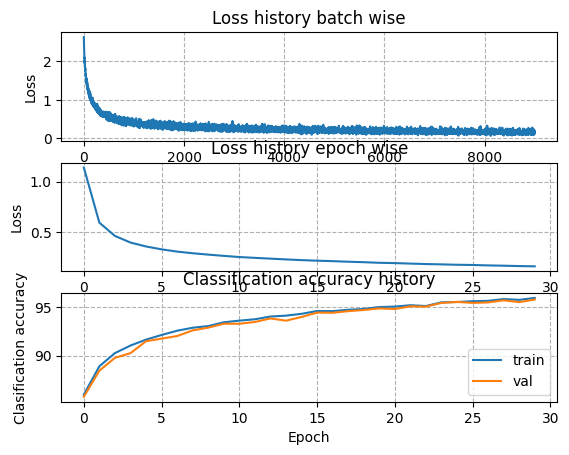

In [49]:
data_dimension = X_train.shape[1]
num_classes = 10

# Parameters
num_hidden_nodes = 100#best_net.best_params['W1'].shape[1]
learnin_rate = 0.01# best_net.learning_rate
num_epoch =  30
batch_size = 200
beta_moment = 1e-1
update_rule = 'm_gd'

param_init = 'ninn_std'#'Xavier'# 'Xavier'#

net = FirstNN(data_dimension, num_hidden_nodes, num_classes, param_init=param_init)

# Train the network
stats = net.train(X_train, Y_train, X_val, Y_val, 
                  num_iters=10000,
                  num_epoch=num_epoch,
                  batch_size=batch_size, 
                  learning_rate=learnin_rate, 
                  beta_moment=beta_moment,
                  update_rule=update_rule,
                  verbose=True
                 )


# Predict on the train set
Y_train_pred = net.predict(X_train, best_param=True)
train_acc = 100*(Y_train_pred == Y_train).mean()
print('Train accuracy: {:.2f}' .format(train_acc))

# Predict on the validation set
Y_val_pred = net.predict(X_val, best_param=True)
val_acc = 100*(Y_val_pred == Y_val).mean()
print('Validation accuracy: {:.2f}' .format(val_acc))

# Predict on the test set
Y_test_pred = net.predict(X_test, best_param=True)
test_acc = 100*(Y_test_pred == Y_test).mean()
print('Test accuracy: {:.2f}' .format(test_acc))





# Plot the loss function and train / validation accuracies
plt.subplot(3, 1, 1)
plt.plot(stats['loss_history_batch'])
plt.title('Loss history batch wise')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(linestyle='--')

plt.subplot(3, 1, 2)
plt.plot(stats['loss_history_epoch'])
plt.title('Loss history epoch wise')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(linestyle='--')

plt.subplot(3, 1, 3)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.grid(linestyle='--')
plt.legend()
plt.show()

## MGD + Xavier

Xavier
Training epoch 1/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.796300: 100%|██████████| 300/300 [00:02<00:00, 119.72it/s]


epoch: 1 / (30), loss: 1.173892, train acc: 83.85, val acc: 83.75
Training epoch 2/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.495191: 100%|██████████| 300/300 [00:02<00:00, 120.80it/s]


epoch: 2 / (30), loss: 0.617063, train acc: 87.75, val acc: 87.38
Training epoch 3/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.397207: 100%|██████████| 300/300 [00:02<00:00, 118.88it/s]


epoch: 3 / (30), loss: 0.485537, train acc: 89.32, val acc: 88.93
Training epoch 4/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.411742: 100%|██████████| 300/300 [00:02<00:00, 120.89it/s]


epoch: 4 / (30), loss: 0.420327, train acc: 90.33, val acc: 89.66
Training epoch 5/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.422916: 100%|██████████| 300/300 [00:02<00:00, 117.00it/s]


epoch: 5 / (30), loss: 0.377874, train acc: 90.92, val acc: 90.27
Training epoch 6/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.371039: 100%|██████████| 300/300 [00:02<00:00, 119.10it/s]


epoch: 6 / (30), loss: 0.349342, train acc: 91.35, val acc: 90.88
Training epoch 7/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.328902: 100%|██████████| 300/300 [00:02<00:00, 120.45it/s]


epoch: 7 / (30), loss: 0.327741, train acc: 91.82, val acc: 91.13
Training epoch 8/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.207407: 100%|██████████| 300/300 [00:02<00:00, 120.72it/s]


epoch: 8 / (30), loss: 0.309670, train acc: 92.13, val acc: 91.65
Training epoch 9/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.341145: 100%|██████████| 300/300 [00:02<00:00, 121.86it/s]


epoch: 9 / (30), loss: 0.295614, train acc: 92.35, val acc: 91.57
Training epoch 10/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.309999: 100%|██████████| 300/300 [00:02<00:00, 119.16it/s]


epoch: 10 / (30), loss: 0.282331, train acc: 92.74, val acc: 92.08
Training epoch 11/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.211717: 100%|██████████| 300/300 [00:02<00:00, 116.73it/s]


epoch: 11 / (30), loss: 0.272641, train acc: 93.01, val acc: 92.55
Training epoch 12/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.248889: 100%|██████████| 300/300 [00:02<00:00, 118.78it/s]


epoch: 12 / (30), loss: 0.262291, train acc: 93.12, val acc: 92.82
Training epoch 13/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.241388: 100%|██████████| 300/300 [00:02<00:00, 117.56it/s]


epoch: 13 / (30), loss: 0.253667, train acc: 93.38, val acc: 92.90
Training epoch 14/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.186681: 100%|██████████| 300/300 [00:02<00:00, 120.51it/s]


epoch: 14 / (30), loss: 0.245710, train acc: 93.56, val acc: 92.98
Training epoch 15/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.247152: 100%|██████████| 300/300 [00:02<00:00, 109.34it/s]


epoch: 15 / (30), loss: 0.238141, train acc: 93.93, val acc: 93.28
Training epoch 16/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.186472: 100%|██████████| 300/300 [00:02<00:00, 117.35it/s]


epoch: 16 / (30), loss: 0.229378, train acc: 93.87, val acc: 93.65
Training epoch 17/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.201676: 100%|██████████| 300/300 [00:02<00:00, 118.27it/s]


epoch: 17 / (30), loss: 0.224983, train acc: 94.08, val acc: 93.87
Training epoch 18/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.280054: 100%|██████████| 300/300 [00:02<00:00, 116.43it/s]


epoch: 18 / (30), loss: 0.220022, train acc: 94.25, val acc: 93.80
Training epoch 19/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.233050: 100%|██████████| 300/300 [00:02<00:00, 121.43it/s]


epoch: 19 / (30), loss: 0.215347, train acc: 94.36, val acc: 94.07
Training epoch 20/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.220770: 100%|██████████| 300/300 [00:02<00:00, 118.68it/s]


epoch: 20 / (30), loss: 0.210692, train acc: 94.45, val acc: 94.08
Training epoch 21/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.144966: 100%|██████████| 300/300 [00:02<00:00, 120.64it/s]


epoch: 21 / (30), loss: 0.205990, train acc: 94.64, val acc: 94.32
Training epoch 22/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.204630: 100%|██████████| 300/300 [00:02<00:00, 113.84it/s]


epoch: 22 / (30), loss: 0.201294, train acc: 94.80, val acc: 94.45
Training epoch 23/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.244381: 100%|██████████| 300/300 [00:02<00:00, 118.38it/s]


epoch: 23 / (30), loss: 0.196365, train acc: 94.92, val acc: 94.52
Training epoch 24/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.318074: 100%|██████████| 300/300 [00:02<00:00, 117.41it/s]


epoch: 24 / (30), loss: 0.192695, train acc: 95.09, val acc: 94.97
Training epoch 25/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.159298: 100%|██████████| 300/300 [00:02<00:00, 118.51it/s]


epoch: 25 / (30), loss: 0.188021, train acc: 95.13, val acc: 94.92
Training epoch 26/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.154820: 100%|██████████| 300/300 [00:02<00:00, 120.31it/s]


epoch: 26 / (30), loss: 0.185874, train acc: 95.07, val acc: 94.88
Training epoch 27/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.108156: 100%|██████████| 300/300 [00:02<00:00, 115.61it/s]


epoch: 27 / (30), loss: 0.183584, train acc: 95.16, val acc: 94.90
Training epoch 28/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.166546: 100%|██████████| 300/300 [00:02<00:00, 109.19it/s]


epoch: 28 / (30), loss: 0.179203, train acc: 95.23, val acc: 95.12
Training epoch 29/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.148338: 100%|██████████| 300/300 [00:02<00:00, 116.30it/s]


epoch: 29 / (30), loss: 0.175549, train acc: 95.43, val acc: 95.30
Training epoch 30/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.169914: 100%|██████████| 300/300 [00:03<00:00, 80.89it/s] 


epoch: 30 / (30), loss: 0.173143, train acc: 95.39, val acc: 95.07
Train accuracy: 95.43
Validation accuracy: 95.30
Test accuracy: 94.29


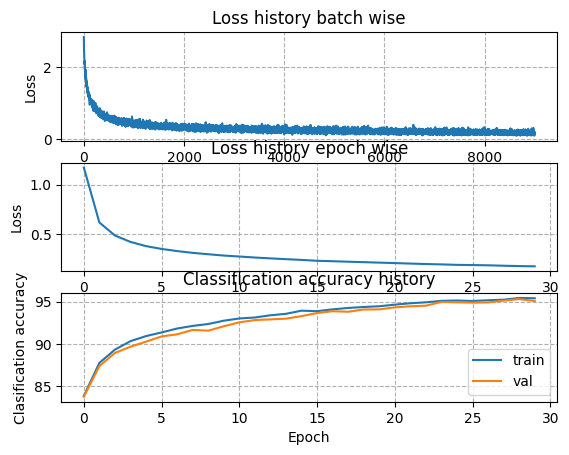

In [50]:
data_dimension = X_train.shape[1]
num_classes = 10

# Parameters
num_hidden_nodes = 100#best_net.best_params['W1'].shape[1]
learnin_rate = 0.01# best_net.learning_rate
num_epoch =  30
batch_size = 200
beta_moment = 1e-1
update_rule = 'm_gd'

param_init = 'Xavier'#'Xavier'# 'Xavier'#

net = FirstNN(data_dimension, num_hidden_nodes, num_classes, param_init=param_init)

# Train the network
stats = net.train(X_train, Y_train, X_val, Y_val, 
                  num_iters=10000,
                  num_epoch=num_epoch,
                  batch_size=batch_size, 
                  learning_rate=learnin_rate, 
                  beta_moment=beta_moment,
                  update_rule=update_rule,
                  verbose=True
                 )


# Predict on the train set
Y_train_pred = net.predict(X_train, best_param=True)
train_acc = 100*(Y_train_pred == Y_train).mean()
print('Train accuracy: {:.2f}' .format(train_acc))

# Predict on the validation set
Y_val_pred = net.predict(X_val, best_param=True)
val_acc = 100*(Y_val_pred == Y_val).mean()
print('Validation accuracy: {:.2f}' .format(val_acc))

# Predict on the test set
Y_test_pred = net.predict(X_test, best_param=True)
test_acc = 100*(Y_test_pred == Y_test).mean()
print('Test accuracy: {:.2f}' .format(test_acc))





# Plot the loss function and train / validation accuracies
plt.subplot(3, 1, 1)
plt.plot(stats['loss_history_batch'])
plt.title('Loss history batch wise')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(linestyle='--')

plt.subplot(3, 1, 2)
plt.plot(stats['loss_history_epoch'])
plt.title('Loss history epoch wise')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(linestyle='--')

plt.subplot(3, 1, 3)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.grid(linestyle='--')
plt.legend()
plt.show()

## NMGD + Small_std

Training epoch 1/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 1.115367: 100%|██████████| 300/300 [00:05<00:00, 56.38it/s]


epoch: 1 / (30), loss: 1.535148, train acc: 80.64, val acc: 80.63
Training epoch 2/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.916809: 100%|██████████| 300/300 [00:05<00:00, 53.59it/s]


epoch: 2 / (30), loss: 0.933966, train acc: 88.36, val acc: 88.45
Training epoch 3/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.549729: 100%|██████████| 300/300 [00:05<00:00, 56.08it/s]


epoch: 3 / (30), loss: 0.695919, train acc: 90.84, val acc: 90.93
Training epoch 4/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.532525: 100%|██████████| 300/300 [00:05<00:00, 55.46it/s]


epoch: 4 / (30), loss: 0.544719, train acc: 91.96, val acc: 92.03
Training epoch 5/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.411502: 100%|██████████| 300/300 [00:05<00:00, 56.30it/s]


epoch: 5 / (30), loss: 0.452642, train acc: 92.70, val acc: 92.67
Training epoch 6/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.414836: 100%|██████████| 300/300 [00:05<00:00, 54.20it/s]


epoch: 6 / (30), loss: 0.390508, train acc: 93.21, val acc: 92.90
Training epoch 7/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.370833: 100%|██████████| 300/300 [00:05<00:00, 57.78it/s]


epoch: 7 / (30), loss: 0.344737, train acc: 93.38, val acc: 92.98
Training epoch 8/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.330603: 100%|██████████| 300/300 [00:05<00:00, 58.29it/s]


epoch: 8 / (30), loss: 0.310458, train acc: 93.69, val acc: 93.52
Training epoch 9/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.280891: 100%|██████████| 300/300 [00:05<00:00, 57.36it/s]


epoch: 9 / (30), loss: 0.285116, train acc: 94.13, val acc: 94.08
Training epoch 10/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.266878: 100%|██████████| 300/300 [00:05<00:00, 57.40it/s]


epoch: 10 / (30), loss: 0.265531, train acc: 94.17, val acc: 94.17
Training epoch 11/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.244884: 100%|██████████| 300/300 [00:05<00:00, 57.21it/s]


epoch: 11 / (30), loss: 0.253390, train acc: 94.31, val acc: 94.32
Training epoch 12/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.152693: 100%|██████████| 300/300 [00:05<00:00, 58.23it/s]


epoch: 12 / (30), loss: 0.238493, train acc: 94.66, val acc: 94.55
Training epoch 13/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.205539: 100%|██████████| 300/300 [00:05<00:00, 54.62it/s]


epoch: 13 / (30), loss: 0.228058, train acc: 94.87, val acc: 94.62
Training epoch 14/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.210399: 100%|██████████| 300/300 [00:05<00:00, 57.48it/s]


epoch: 14 / (30), loss: 0.217178, train acc: 95.06, val acc: 95.13
Training epoch 15/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.215568: 100%|██████████| 300/300 [00:05<00:00, 57.54it/s]


epoch: 15 / (30), loss: 0.211186, train acc: 95.13, val acc: 95.07
Training epoch 16/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.198929: 100%|██████████| 300/300 [00:05<00:00, 57.76it/s]


epoch: 16 / (30), loss: 0.201977, train acc: 95.29, val acc: 94.90
Training epoch 17/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.206330: 100%|██████████| 300/300 [00:05<00:00, 59.36it/s]


epoch: 17 / (30), loss: 0.193854, train acc: 95.38, val acc: 94.92
Training epoch 18/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.204846: 100%|██████████| 300/300 [00:05<00:00, 57.66it/s]


epoch: 18 / (30), loss: 0.187860, train acc: 95.40, val acc: 95.27
Training epoch 19/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.193670: 100%|██████████| 300/300 [00:05<00:00, 58.33it/s]


epoch: 19 / (30), loss: 0.181460, train acc: 95.58, val acc: 95.77
Training epoch 20/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.127884: 100%|██████████| 300/300 [00:05<00:00, 57.78it/s]


epoch: 20 / (30), loss: 0.176895, train acc: 95.78, val acc: 95.53
Training epoch 21/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.153660: 100%|██████████| 300/300 [00:05<00:00, 59.25it/s]


epoch: 21 / (30), loss: 0.172450, train acc: 95.61, val acc: 95.30
Training epoch 22/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.173953: 100%|██████████| 300/300 [00:05<00:00, 57.46it/s]


epoch: 22 / (30), loss: 0.167840, train acc: 95.83, val acc: 95.77
Training epoch 23/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.139608: 100%|██████████| 300/300 [00:05<00:00, 58.95it/s]


epoch: 23 / (30), loss: 0.164960, train acc: 96.02, val acc: 95.82
Training epoch 24/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.126860: 100%|██████████| 300/300 [00:05<00:00, 57.60it/s]


epoch: 24 / (30), loss: 0.160034, train acc: 96.21, val acc: 95.85
Training epoch 25/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.131775: 100%|██████████| 300/300 [00:05<00:00, 59.72it/s]


epoch: 25 / (30), loss: 0.155623, train acc: 96.23, val acc: 95.97
Training epoch 26/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.129251: 100%|██████████| 300/300 [00:05<00:00, 56.72it/s]


epoch: 26 / (30), loss: 0.152467, train acc: 96.31, val acc: 96.05
Training epoch 27/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.167693: 100%|██████████| 300/300 [00:05<00:00, 58.73it/s]


epoch: 27 / (30), loss: 0.149926, train acc: 96.43, val acc: 96.48
Training epoch 28/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.183073: 100%|██████████| 300/300 [00:05<00:00, 56.92it/s]


epoch: 28 / (30), loss: 0.146047, train acc: 96.50, val acc: 96.35
Training epoch 29/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.102080: 100%|██████████| 300/300 [00:07<00:00, 39.09it/s]


epoch: 29 / (30), loss: 0.144513, train acc: 96.37, val acc: 96.37
Training epoch 30/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.140106: 100%|██████████| 300/300 [00:02<00:00, 122.91it/s]


epoch: 30 / (30), loss: 0.143182, train acc: 96.51, val acc: 96.58
Train accuracy: 96.51
Validation accuracy: 96.58
Test accuracy: 95.27


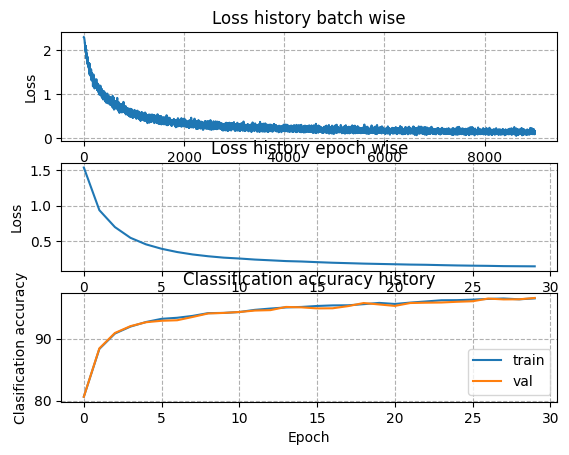

In [51]:
data_dimension = X_train.shape[1]
num_classes = 10

# Parameters
num_hidden_nodes = 100#best_net.best_params['W1'].shape[1]
learnin_rate = 0.01# best_net.learning_rate
num_epoch =  30
batch_size = 200
beta_moment = 1e-1
update_rule = 'nm_gd'

param_init = 'small_std'#'Xavier'# 'Xavier'#

net = FirstNN(data_dimension, num_hidden_nodes, num_classes, param_init=param_init)

# Train the network
stats = net.train(X_train, Y_train, X_val, Y_val, 
                  num_iters=10000,
                  num_epoch=num_epoch,
                  batch_size=batch_size, 
                  learning_rate=learnin_rate, 
                  beta_moment=beta_moment,
                  update_rule=update_rule,
                  verbose=True
                 )


# Predict on the train set
Y_train_pred = net.predict(X_train, best_param=True)
train_acc = 100*(Y_train_pred == Y_train).mean()
print('Train accuracy: {:.2f}' .format(train_acc))

# Predict on the validation set
Y_val_pred = net.predict(X_val, best_param=True)
val_acc = 100*(Y_val_pred == Y_val).mean()
print('Validation accuracy: {:.2f}' .format(val_acc))

# Predict on the test set
Y_test_pred = net.predict(X_test, best_param=True)
test_acc = 100*(Y_test_pred == Y_test).mean()
print('Test accuracy: {:.2f}' .format(test_acc))





# Plot the loss function and train / validation accuracies
plt.subplot(3, 1, 1)
plt.plot(stats['loss_history_batch'])
plt.title('Loss history batch wise')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(linestyle='--')

plt.subplot(3, 1, 2)
plt.plot(stats['loss_history_epoch'])
plt.title('Loss history epoch wise')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(linestyle='--')

plt.subplot(3, 1, 3)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.grid(linestyle='--')
plt.legend()
plt.show()

## NMGD + Ninn_std

Training epoch 1/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.840285: 100%|██████████| 300/300 [00:03<00:00, 83.54it/s] 


epoch: 1 / (30), loss: 1.234864, train acc: 85.49, val acc: 85.90
Training epoch 2/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.468492: 100%|██████████| 300/300 [00:03<00:00, 92.43it/s] 


epoch: 2 / (30), loss: 0.629210, train acc: 88.47, val acc: 88.06
Training epoch 3/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.420481: 100%|██████████| 300/300 [00:02<00:00, 107.34it/s]


epoch: 3 / (30), loss: 0.480009, train acc: 89.81, val acc: 89.48
Training epoch 4/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.416375: 100%|██████████| 300/300 [00:03<00:00, 97.38it/s] 


epoch: 4 / (30), loss: 0.408665, train acc: 90.78, val acc: 90.47
Training epoch 5/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.412942: 100%|██████████| 300/300 [00:02<00:00, 110.79it/s]


epoch: 5 / (30), loss: 0.364925, train acc: 91.26, val acc: 90.95
Training epoch 6/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.308220: 100%|██████████| 300/300 [00:03<00:00, 95.26it/s] 


epoch: 6 / (30), loss: 0.334406, train acc: 91.77, val acc: 91.72
Training epoch 7/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.376611: 100%|██████████| 300/300 [00:03<00:00, 94.78it/s] 


epoch: 7 / (30), loss: 0.313285, train acc: 92.16, val acc: 92.00
Training epoch 8/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.265901: 100%|██████████| 300/300 [00:02<00:00, 101.62it/s]


epoch: 8 / (30), loss: 0.296455, train acc: 92.43, val acc: 92.28
Training epoch 9/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.308584: 100%|██████████| 300/300 [00:02<00:00, 101.96it/s]


epoch: 9 / (30), loss: 0.281763, train acc: 92.91, val acc: 92.57
Training epoch 10/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.248903: 100%|██████████| 300/300 [00:02<00:00, 107.22it/s]


epoch: 10 / (30), loss: 0.269554, train acc: 93.10, val acc: 92.95
Training epoch 11/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.254244: 100%|██████████| 300/300 [00:03<00:00, 86.69it/s] 


epoch: 11 / (30), loss: 0.259110, train acc: 93.38, val acc: 93.32
Training epoch 12/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.237354: 100%|██████████| 300/300 [00:03<00:00, 97.51it/s] 


epoch: 12 / (30), loss: 0.249379, train acc: 93.48, val acc: 93.22
Training epoch 13/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.181611: 100%|██████████| 300/300 [00:02<00:00, 119.11it/s]


epoch: 13 / (30), loss: 0.241510, train acc: 93.75, val acc: 93.43
Training epoch 14/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.221420: 100%|██████████| 300/300 [00:02<00:00, 112.11it/s]


epoch: 14 / (30), loss: 0.233035, train acc: 93.90, val acc: 93.68
Training epoch 15/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.204839: 100%|██████████| 300/300 [00:02<00:00, 116.23it/s]


epoch: 15 / (30), loss: 0.225526, train acc: 94.10, val acc: 93.75
Training epoch 16/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.199312: 100%|██████████| 300/300 [00:02<00:00, 117.33it/s]


epoch: 16 / (30), loss: 0.219306, train acc: 94.35, val acc: 94.12
Training epoch 17/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.250785: 100%|██████████| 300/300 [00:02<00:00, 118.69it/s]


epoch: 17 / (30), loss: 0.212307, train acc: 94.49, val acc: 94.20
Training epoch 18/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.205852: 100%|██████████| 300/300 [00:02<00:00, 111.77it/s]


epoch: 18 / (30), loss: 0.207967, train acc: 94.61, val acc: 94.37
Training epoch 19/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.193904: 100%|██████████| 300/300 [00:02<00:00, 114.77it/s]


epoch: 19 / (30), loss: 0.204108, train acc: 94.65, val acc: 94.50
Training epoch 20/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.136221: 100%|██████████| 300/300 [00:02<00:00, 118.35it/s]


epoch: 20 / (30), loss: 0.196890, train acc: 94.87, val acc: 94.92
Training epoch 21/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.197951: 100%|██████████| 300/300 [00:02<00:00, 116.32it/s]


epoch: 21 / (30), loss: 0.193634, train acc: 94.85, val acc: 94.62
Training epoch 22/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.172658: 100%|██████████| 300/300 [00:02<00:00, 118.67it/s]


epoch: 22 / (30), loss: 0.191110, train acc: 95.02, val acc: 94.90
Training epoch 23/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.197513: 100%|██████████| 300/300 [00:02<00:00, 115.98it/s]


epoch: 23 / (30), loss: 0.186083, train acc: 95.24, val acc: 94.83
Training epoch 24/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.177864: 100%|██████████| 300/300 [00:02<00:00, 101.29it/s]


epoch: 24 / (30), loss: 0.180935, train acc: 95.25, val acc: 94.85
Training epoch 25/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.147248: 100%|██████████| 300/300 [00:02<00:00, 105.29it/s]


epoch: 25 / (30), loss: 0.177854, train acc: 95.38, val acc: 95.05
Training epoch 26/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.170229: 100%|██████████| 300/300 [00:03<00:00, 82.66it/s] 


epoch: 26 / (30), loss: 0.173882, train acc: 95.46, val acc: 95.13
Training epoch 27/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.199500: 100%|██████████| 300/300 [00:03<00:00, 78.18it/s]


epoch: 27 / (30), loss: 0.171285, train acc: 95.61, val acc: 95.33
Training epoch 28/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.137847: 100%|██████████| 300/300 [00:03<00:00, 98.31it/s] 


epoch: 28 / (30), loss: 0.167923, train acc: 95.76, val acc: 95.45
Training epoch 29/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.170388: 100%|██████████| 300/300 [00:02<00:00, 142.96it/s]


epoch: 29 / (30), loss: 0.164440, train acc: 95.83, val acc: 95.53
Training epoch 30/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.146748: 100%|██████████| 300/300 [00:02<00:00, 147.22it/s]


epoch: 30 / (30), loss: 0.161053, train acc: 95.77, val acc: 95.38
Train accuracy: 95.83
Validation accuracy: 95.53
Test accuracy: 94.65


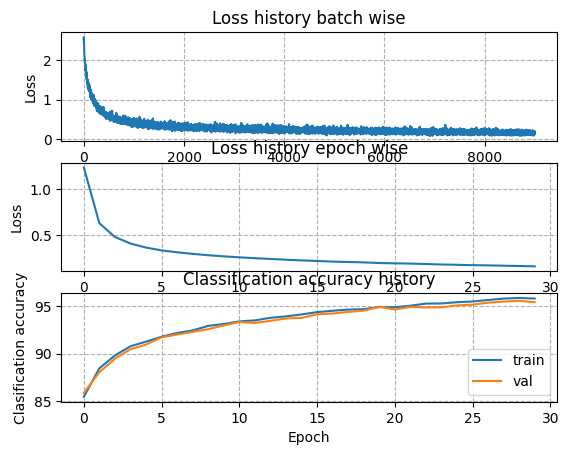

In [52]:
data_dimension = X_train.shape[1]
num_classes = 10

# Parameters
num_hidden_nodes = 100#best_net.best_params['W1'].shape[1]
learnin_rate = 0.01# best_net.learning_rate
num_epoch =  30
batch_size = 200
beta_moment = 1e-1
update_rule = 'm_gd'

param_init = 'ninn_std'#'Xavier'# 'Xavier'#

net = FirstNN(data_dimension, num_hidden_nodes, num_classes, param_init=param_init)

# Train the network
stats = net.train(X_train, Y_train, X_val, Y_val, 
                  num_iters=10000,
                  num_epoch=num_epoch,
                  batch_size=batch_size, 
                  learning_rate=learnin_rate, 
                  beta_moment=beta_moment,
                  update_rule=update_rule,
                  verbose=True
                 )


# Predict on the train set
Y_train_pred = net.predict(X_train, best_param=True)
train_acc = 100*(Y_train_pred == Y_train).mean()
print('Train accuracy: {:.2f}' .format(train_acc))

# Predict on the validation set
Y_val_pred = net.predict(X_val, best_param=True)
val_acc = 100*(Y_val_pred == Y_val).mean()
print('Validation accuracy: {:.2f}' .format(val_acc))

# Predict on the test set
Y_test_pred = net.predict(X_test, best_param=True)
test_acc = 100*(Y_test_pred == Y_test).mean()
print('Test accuracy: {:.2f}' .format(test_acc))





# Plot the loss function and train / validation accuracies
plt.subplot(3, 1, 1)
plt.plot(stats['loss_history_batch'])
plt.title('Loss history batch wise')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(linestyle='--')

plt.subplot(3, 1, 2)
plt.plot(stats['loss_history_epoch'])
plt.title('Loss history epoch wise')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(linestyle='--')

plt.subplot(3, 1, 3)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.grid(linestyle='--')
plt.legend()
plt.show()

## NMGD + Xavier

Xavier
Training epoch 1/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.722190: 100%|██████████| 300/300 [00:01<00:00, 179.89it/s]


epoch: 1 / (30), loss: 1.162766, train acc: 83.94, val acc: 83.80
Training epoch 2/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.610261: 100%|██████████| 300/300 [00:01<00:00, 179.34it/s]


epoch: 2 / (30), loss: 0.627189, train acc: 87.95, val acc: 87.73
Training epoch 3/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.542669: 100%|██████████| 300/300 [00:01<00:00, 183.41it/s]


epoch: 3 / (30), loss: 0.490303, train acc: 89.45, val acc: 89.08
Training epoch 4/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.435995: 100%|██████████| 300/300 [00:01<00:00, 181.17it/s]


epoch: 4 / (30), loss: 0.421011, train acc: 90.34, val acc: 89.75
Training epoch 5/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.394812: 100%|██████████| 300/300 [00:01<00:00, 185.27it/s]


epoch: 5 / (30), loss: 0.377037, train acc: 91.02, val acc: 90.65
Training epoch 6/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.396667: 100%|██████████| 300/300 [00:01<00:00, 199.56it/s]


epoch: 6 / (30), loss: 0.347447, train acc: 91.57, val acc: 91.33
Training epoch 7/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.288108: 100%|██████████| 300/300 [00:01<00:00, 168.06it/s]


epoch: 7 / (30), loss: 0.326008, train acc: 91.78, val acc: 91.57
Training epoch 8/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.302904: 100%|██████████| 300/300 [00:01<00:00, 192.64it/s]


epoch: 8 / (30), loss: 0.306685, train acc: 92.33, val acc: 92.07
Training epoch 9/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.303525: 100%|██████████| 300/300 [00:01<00:00, 192.45it/s]


epoch: 9 / (30), loss: 0.293966, train acc: 92.55, val acc: 92.37
Training epoch 10/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.279083: 100%|██████████| 300/300 [00:01<00:00, 170.39it/s]


epoch: 10 / (30), loss: 0.280353, train acc: 92.86, val acc: 92.75
Training epoch 11/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.211651: 100%|██████████| 300/300 [00:02<00:00, 133.58it/s]


epoch: 11 / (30), loss: 0.269334, train acc: 93.09, val acc: 93.08
Training epoch 12/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.241474: 100%|██████████| 300/300 [00:02<00:00, 148.44it/s]


epoch: 12 / (30), loss: 0.258570, train acc: 93.24, val acc: 93.18
Training epoch 13/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.259114: 100%|██████████| 300/300 [00:02<00:00, 132.77it/s]


epoch: 13 / (30), loss: 0.250742, train acc: 93.52, val acc: 93.27
Training epoch 14/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.258345: 100%|██████████| 300/300 [00:02<00:00, 135.48it/s]


epoch: 14 / (30), loss: 0.243255, train acc: 93.66, val acc: 93.52
Training epoch 15/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.271676: 100%|██████████| 300/300 [00:02<00:00, 140.15it/s]


epoch: 15 / (30), loss: 0.236263, train acc: 93.81, val acc: 93.72
Training epoch 16/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.183376: 100%|██████████| 300/300 [00:01<00:00, 171.71it/s]


epoch: 16 / (30), loss: 0.230986, train acc: 94.04, val acc: 94.13
Training epoch 17/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.191978: 100%|██████████| 300/300 [00:02<00:00, 146.35it/s]


epoch: 17 / (30), loss: 0.224033, train acc: 94.15, val acc: 94.03
Training epoch 18/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.195223: 100%|██████████| 300/300 [00:01<00:00, 156.94it/s]


epoch: 18 / (30), loss: 0.219269, train acc: 94.36, val acc: 94.27
Training epoch 19/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.141148: 100%|██████████| 300/300 [00:02<00:00, 138.06it/s]


epoch: 19 / (30), loss: 0.214994, train acc: 94.35, val acc: 94.27
Training epoch 20/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.174209: 100%|██████████| 300/300 [00:02<00:00, 145.07it/s]


epoch: 20 / (30), loss: 0.209430, train acc: 94.47, val acc: 94.32
Training epoch 21/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.151761: 100%|██████████| 300/300 [00:02<00:00, 139.13it/s]


epoch: 21 / (30), loss: 0.204957, train acc: 94.61, val acc: 94.45
Training epoch 22/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.245582: 100%|██████████| 300/300 [00:02<00:00, 138.57it/s]


epoch: 22 / (30), loss: 0.201142, train acc: 94.76, val acc: 94.68
Training epoch 23/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.223422: 100%|██████████| 300/300 [00:02<00:00, 135.98it/s]


epoch: 23 / (30), loss: 0.197426, train acc: 94.87, val acc: 94.83
Training epoch 24/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.181921: 100%|██████████| 300/300 [00:02<00:00, 145.41it/s]


epoch: 24 / (30), loss: 0.193441, train acc: 94.89, val acc: 94.80
Training epoch 25/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.173875: 100%|██████████| 300/300 [00:01<00:00, 152.01it/s]


epoch: 25 / (30), loss: 0.189512, train acc: 95.03, val acc: 94.88
Training epoch 26/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.213444: 100%|██████████| 300/300 [00:02<00:00, 131.78it/s]


epoch: 26 / (30), loss: 0.186071, train acc: 95.09, val acc: 94.93
Training epoch 27/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.162678: 100%|██████████| 300/300 [00:02<00:00, 141.84it/s]


epoch: 27 / (30), loss: 0.183411, train acc: 95.19, val acc: 94.92
Training epoch 28/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.192127: 100%|██████████| 300/300 [00:02<00:00, 144.21it/s]


epoch: 28 / (30), loss: 0.179237, train acc: 95.33, val acc: 95.12
Training epoch 29/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.180151: 100%|██████████| 300/300 [00:02<00:00, 132.62it/s]


epoch: 29 / (30), loss: 0.177259, train acc: 95.32, val acc: 95.15
Training epoch 30/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.179731: 100%|██████████| 300/300 [00:02<00:00, 127.81it/s]


epoch: 30 / (30), loss: 0.174635, train acc: 95.48, val acc: 95.28
Train accuracy: 95.48
Validation accuracy: 95.28
Test accuracy: 94.25


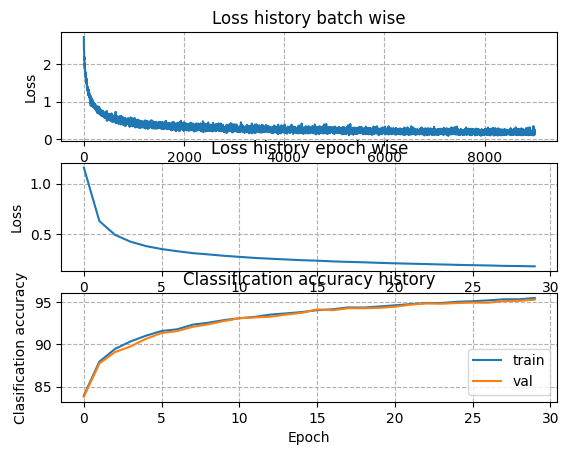

In [53]:
data_dimension = X_train.shape[1]
num_classes = 10

# Parameters
num_hidden_nodes = 100#best_net.best_params['W1'].shape[1]
learnin_rate = 0.01# best_net.learning_rate
num_epoch =  30
batch_size = 200
beta_moment = 1e-1
update_rule = 'm_gd'

param_init = 'Xavier'#'Xavier'# 'Xavier'#

net = FirstNN(data_dimension, num_hidden_nodes, num_classes, param_init=param_init)

# Train the network
stats = net.train(X_train, Y_train, X_val, Y_val, 
                  num_iters=10000,
                  num_epoch=num_epoch,
                  batch_size=batch_size, 
                  learning_rate=learnin_rate, 
                  beta_moment=beta_moment,
                  update_rule=update_rule,
                  verbose=True
                 )


# Predict on the train set
Y_train_pred = net.predict(X_train, best_param=True)
train_acc = 100*(Y_train_pred == Y_train).mean()
print('Train accuracy: {:.2f}' .format(train_acc))

# Predict on the validation set
Y_val_pred = net.predict(X_val, best_param=True)
val_acc = 100*(Y_val_pred == Y_val).mean()
print('Validation accuracy: {:.2f}' .format(val_acc))

# Predict on the test set
Y_test_pred = net.predict(X_test, best_param=True)
test_acc = 100*(Y_test_pred == Y_test).mean()
print('Test accuracy: {:.2f}' .format(test_acc))





# Plot the loss function and train / validation accuracies
plt.subplot(3, 1, 1)
plt.plot(stats['loss_history_batch'])
plt.title('Loss history batch wise')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(linestyle='--')

plt.subplot(3, 1, 2)
plt.plot(stats['loss_history_epoch'])
plt.title('Loss history epoch wise')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(linestyle='--')

plt.subplot(3, 1, 3)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.grid(linestyle='--')
plt.legend()
plt.show()